In [2]:
# Feature Engineering using the Titanic dataset
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('d:/Machine Learning/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Quantifying missing data')

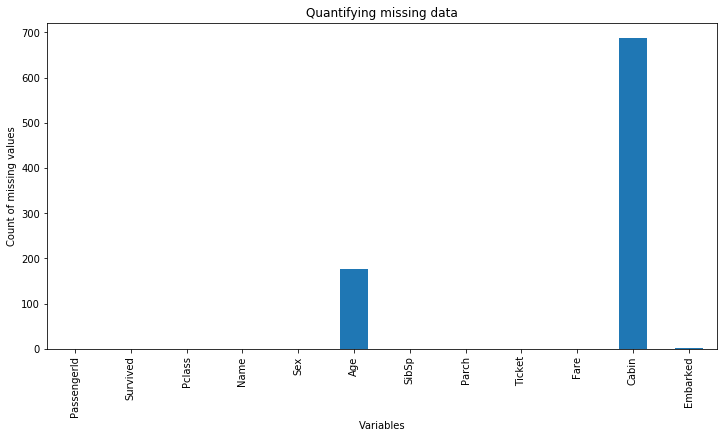

In [4]:
data.isnull().sum().plot.bar(figsize=(12,6))
plt.ylabel('Count of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [6]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

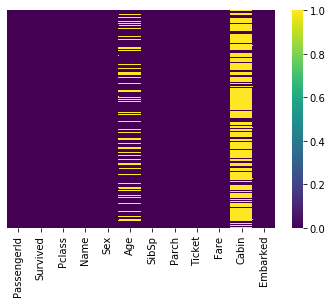

In [8]:
import seaborn as sns
# Use heatmap to determine if there are missing data
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

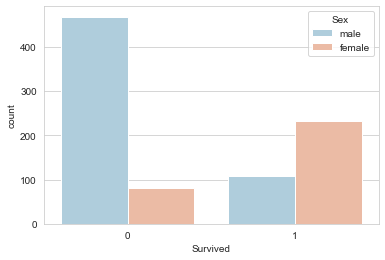

In [10]:
#count-plot of people survided 
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=data, palette='RdBu_r')

Text(0.5, 1.0, 'Cardinality')

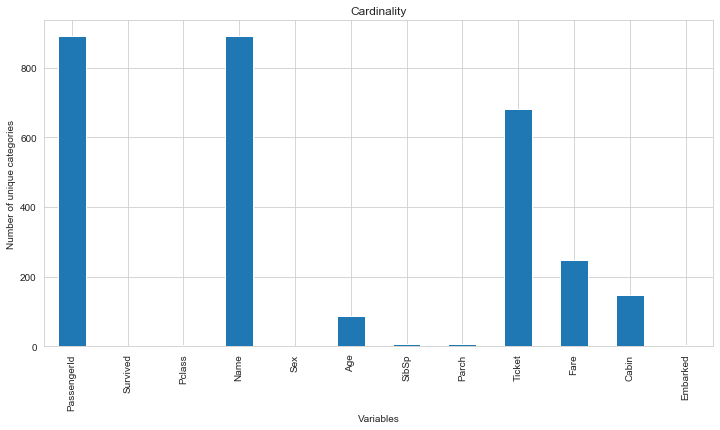

In [11]:
# Plot with cardinality of each variable
data.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')


In [12]:
# Feature engineering with the Boston dataset
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
 columns=boston_dataset.feature_names)

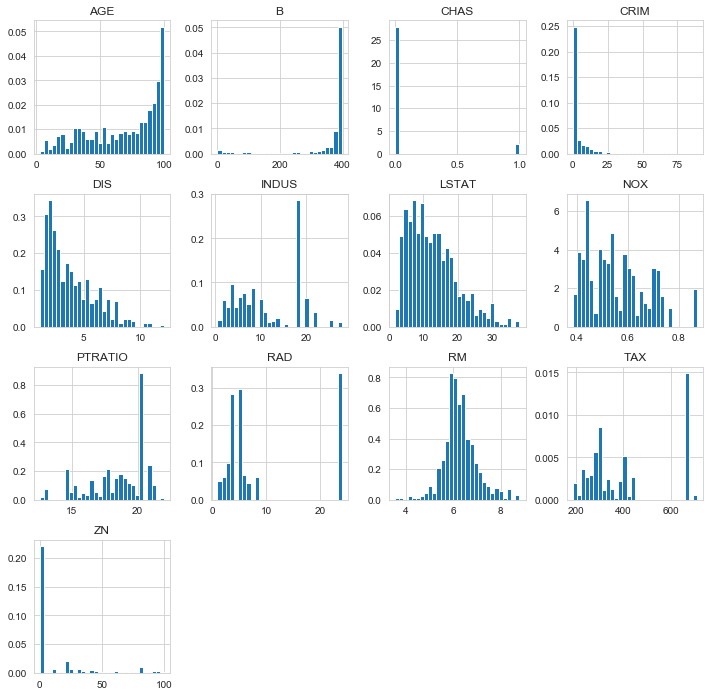

In [13]:
# Visualize the variable distribution with histograms: 
boston.hist(bins=30, figsize=(12,12), density=True)
plt.show()

In [14]:
# Highlighting outliers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]

Text(0.5, 1.0, 'Boxplot')

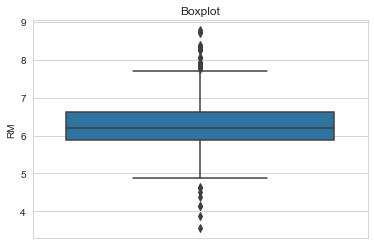

In [15]:
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

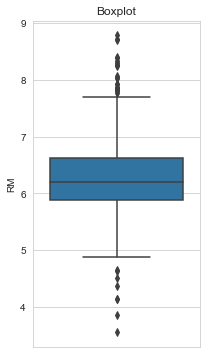

In [16]:
# We can change the final size of the plot using the figure() method from
#Matplotlib. We need to call this command before making the plot with
#seaborn:
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

In [17]:
# To find the outliers in a variable, we need to find the distribution boundaries
# according to the IQR proximity rule: Upper boundary = 75th quantile + (IQR * 1.5)
# Lower boundary = 25th quantile - (IQR * 1.5)
# IQR = 75th quantile - 25th quantile
# Typically, we calculate the IQR proximity rule boundaries by multiplying
# the IQR by 1.5. However, it is also common practice to find extreme
# values by multiplying the IQR by 3.

def find_boundaries(df, variable, distance):
 IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
 lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
 upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
 return upper_boundary, lower_boundary

In [18]:
# Calculate and then display the IQR proximity rule boundaries for the RM variable:
upper_boundary, lower_boundary = find_boundaries(boston, 'RM', 1.5)
upper_boundary, lower_boundary

(7.730499999999999, 4.778500000000001)

In [20]:
# If you want to find very extreme values, you can use 3 as the distance of
# find_boundaries() instead of 1.5.
find_boundaries(boston, 'RM', 1.5)

(7.730499999999999, 4.778500000000001)

In [21]:
# Create a boolean vector to flag observations outside the boundaries 
outliers = np.where(boston['RM'] > upper_boundary, True,
 np.where(boston['RM'] < lower_boundary, True, False))

In [22]:
# Create a new dataframe with the outlier values and then display the top five
# rows:
outliers_df = boston.loc[outliers, 'RM']
outliers_df.head()

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
Name: RM, dtype: float64

In [23]:
# To remove the outliers from the dataset, execute 
boston.loc[~outliers, 'RM']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 476, dtype: float64

In [24]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
# Range 
boston.max() - boston.min()


RM        5.21900
LSTAT    36.24000
CRIM     88.96988
dtype: float64

In [54]:
# Calculate mean for RM
print("Mean for RM:", np.mean(boston['RM']))

Mean for RM: 6.284634387351787


In [48]:
# Calculate std for RM
print("Standard deviation for RM.",np.std(boston['RM']))

Standard deviation for RM. 0.7019225143345692


In [56]:
print("25th percentile: ",np.percentile(boston['RM'], 25))

25th percentile:  5.8855


In [57]:
print("75th percentile: ",np.percentile(boston['RM'], 75))

75th percentile:  6.6235


In [58]:
print("Median: ",np.percentile(boston['RM'], 50))

Median:  6.2085


In [60]:
# Compute the percentage of missing values
boston.isnull().mean().sort_values(ascending=True)

RM       0.0
LSTAT    0.0
CRIM     0.0
dtype: float64